# K-Means Clustering and PCA of Human Activity Recognition


# Table of contents

Contents of the notebook that include, 

- Dataset information
- libraries 
- The problem statement 
- Reading data from Google Drive
- Preprocessing steps
- Elbow plot to find optimal value of K
- Principal component analysis (PCA)
- Results
- Conclusion
- References
- Citation

# Dataset Information
### The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

##Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

## Attribute information
For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

Triaxial Angular velocity from the gyroscope.

A 561-feature vector with time and frequency domain variables.

Its activity label.

An identifier of the subject who carried out the experiment.



# libraries

All the libraries used in the notebook

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

# The problem statement 

Can you identify behavior patterns via smart phone sensor data?

# Reading the data from Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd drive/My Drive

/content/drive/My Drive


In [0]:
Data = pd.read_csv('Kmeans_PCA_train.csv')

# Preprocessing steps

### Let us have a look at a few samples of data to know what we are working with

In [0]:
Data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,tBodyAcc.entropy.Z,tBodyAcc.arCoeff.X.1,tBodyAcc.arCoeff.X.2,tBodyAcc.arCoeff.X.3,tBodyAcc.arCoeff.X.4,tBodyAcc.arCoeff.Y.1,tBodyAcc.arCoeff.Y.2,tBodyAcc.arCoeff.Y.3,tBodyAcc.arCoeff.Y.4,tBodyAcc.arCoeff.Z.1,tBodyAcc.arCoeff.Z.2,tBodyAcc.arCoeff.Z.3,tBodyAcc.arCoeff.Z.4,tBodyAcc.correlation.X.Y,...,fBodyBodyAccJerkMag.energy,fBodyBodyAccJerkMag.iqr,fBodyBodyAccJerkMag.entropy,fBodyBodyAccJerkMag.maxInds,fBodyBodyAccJerkMag.meanFreq,fBodyBodyAccJerkMag.skewness,fBodyBodyAccJerkMag.kurtosis,fBodyBodyGyroMag.mean,fBodyBodyGyroMag.std,fBodyBodyGyroMag.mad,fBodyBodyGyroMag.max,fBodyBodyGyroMag.min,fBodyBodyGyroMag.sma,fBodyBodyGyroMag.energy,fBodyBodyGyroMag.iqr,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
849,2416,SITTING,0.281,-0.01340,-0.1000,-0.9940,-0.9740,-0.982,-0.995,-0.9740,-0.982,-0.939,-0.559,-0.812,0.842,0.686,0.832,-0.9860,-1.000,-1.000,-1.000,-0.996,-0.976,-0.981,-0.520,-0.396,-0.3740,0.126,-0.192,0.2500,0.0772,-0.0804,0.0293,0.20400,-0.19100,0.1190,0.0068,0.1020,-0.12900,0.28300,...,-1.000,-0.988,-1.0000,-0.937,0.3640,-0.391,-0.772,-0.966,-0.938,-0.958,-0.924,-0.990,-0.966,-0.998,-0.987,-0.611,-1.000,-0.1920,0.6210,0.418,-0.996,-0.994,-0.994,-0.995,-0.997,-0.996,-1.000,-0.994,-0.956,-0.968,0.1220,-0.2270,-0.5950,-0.2200,0.3920,0.00846,-0.0306,-0.880,0.0395,-0.0474
1809,5171,WALKING,0.304,-0.02050,-0.1960,-0.5480,-0.1430,-0.290,-0.575,-0.1590,-0.297,-0.441,-0.166,-0.278,0.409,0.114,0.310,-0.3250,-0.896,-0.857,-0.760,-0.599,-0.296,-0.393,0.655,0.282,-0.0224,-0.411,0.343,-0.0669,-0.0751,-0.4630,0.3490,0.08880,-0.11200,-0.6090,0.4870,-0.1690,-0.14100,0.04240,...,-0.863,-0.548,0.0494,-0.905,0.0069,0.533,0.365,-0.492,-0.381,-0.371,-0.326,-0.822,-0.492,-0.792,-0.387,0.396,-0.949,-0.2310,0.0327,-0.239,-0.743,-0.720,-0.717,-0.692,-0.827,-0.743,-0.961,-0.697,0.196,-0.905,-0.0299,0.2070,-0.0592,0.0914,0.0751,-0.86600,0.5580,-0.663,0.1600,-0.2170
1462,4182,STANDING,0.270,-0.02230,-0.0917,-0.9480,-0.8810,-0.892,-0.959,-0.8900,-0.885,-0.865,-0.479,-0.727,0.752,0.612,0.814,-0.9150,-0.998,-0.997,-0.993,-0.970,-0.923,-0.878,-0.116,-0.238,-0.0179,-0.139,0.252,-0.3360,0.6610,-0.1160,0.0460,0.26000,0.11000,-0.3030,0.1610,0.0215,-0.00721,-0.19800,...,-0.996,-0.926,-0.5660,-0.968,-0.1820,-0.106,-0.507,-0.921,-0.885,-0.892,-0.895,-0.975,-0.921,-0.993,-0.956,-0.279,-0.949,-0.3390,-0.1440,-0.555,-0.941,-0.941,-0.940,-0.944,-0.946,-0.941,-0.998,-0.943,-0.487,-0.968,-0.0236,-0.0406,-0.4640,0.1710,-0.2100,-0.14200,-0.2080,-0.609,0.3280,0.1600
3300,9418,STANDING,0.279,-0.01910,-0.1110,-0.9960,-0.9880,-0.974,-0.996,-0.9870,-0.970,-0.940,-0.569,-0.813,0.852,0.688,0.838,-0.9880,-1.000,-1.000,-0.999,-0.996,-0.987,-0.959,-0.591,-0.672,-0.4570,0.405,-0.258,0.3760,-0.0354,0.1320,-0.0645,0.20100,0.00546,0.0836,0.0280,-0.0651,-0.19900,-0.00808,...,-1.000,-0.995,-1.0000,-0.968,0.4150,-0.565,-0.783,-0.992,-0.992,-0.992,-0.993,-0.999,-0.992,-1.000,-0.992,-0.830,-0.949,0.1900,-0.4360,-0.743,-0.994,-0.994,-0.994,-0.994,-0.996,-0.994,-1.000,-0.993,-0.956,-1.000,0.

### Let's check the size of our dataset

In [0]:
print('Shape of the data set: ' + str(Data.shape))

Shape of the data set: (3609, 563)


### Saving Labels as strings and checking the unique strings

In [0]:
#save labels as string
Labels = Data['activity'] # save activity column to a variable called 'Labels'
Data = Data.drop(['rn', 'activity'], axis = 1) # drops activity column
Labels_keys = Labels.unique().tolist() # finds unique labels and converts it to a list
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


### Let us check if we have missing values in our data

In [0]:
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


### Scaling our data

In [0]:
#normalize the dataset
scaler = StandardScaler()
Data = scaler.fit_transform(Data) # scaling the data

Now that we have pre-processed our data, let us go ahead and use K means algorithm for clustering

K-means is a simple unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters. The algorithm is somewhat naive--it clusters the data into k clusters, even if k is not the right number of clusters to use. Therefore, when using k-means clustering, we need some way to determine whether they are using the right number of clusters.

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10), and for each value of k calculate the sum of squared errors (SSE). The goal is to minimise the inertia, or within-cluster sum-of-squares criterion.

# Elbow plot to find the optimal value of K

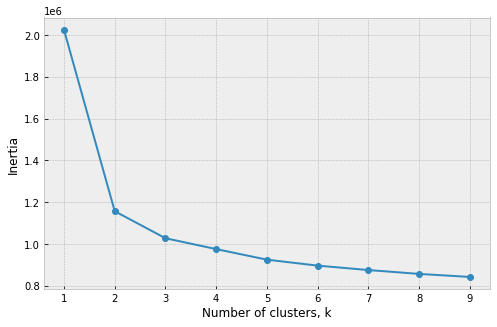

In [0]:
ks = range(1, 10)
inertias = [] # initializing an empty array

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

### From the above graph, we can see that, after the Number of clusters crosses 2, the decrease in steepness of inertia is not as much, hence we can take K = 2(please feel free to change the value of K and observe the change in results)

### Now that we have defined our K value, Let us define our k_means function -

In [0]:
def k_means(n_clust, data_frame, true_labels):
    """
    Function k_means applies k-means clustering alrorithm on dataset and prints the crosstab of cluster and actual labels 
    and clustering performance parameters.
    
    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels
    
    Output:
    1 - crosstab of cluster and actual labels
    2 - performance table
    """
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
    %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

### Applying the k_means function with K=2

In [0]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,1,1,0,603,493,535
1,680,622,668,0,0,6


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.378   0.981   0.546   0.329   0.546    0.390


### In unsupervised learning, we don't have the ground truth labels.If the ground truth labels are not known, evaluation must be performed using the model itself. The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters.

### Our inertia value looks like a very big number and our silhoutte score looks small, hence we can say that our model didn't perform quite as well as how we wanted it to perform.

### Let us make the problem a little more specific by changing our labels to only 2 classes based on movement -> Moving or Non Moving (from our existing classes of sitting/standing/laying/walking/walking_downstairs/walking_upstairs)

### We convert the classes -> sitting, standing and laying to not moving

### and similarly, convert the classes -> walking, walking_downstairs, walking_upstairs to moving

In [0]:
#change labels into binary: 0 - moving, 1 - not moving
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'): # for given labels, replacing strings with 1's
        Labels_binary[i] = 1
    else:
        Labels_binary[i] = 0 # replacing the rest of the labels with 0
Labels_binary = np.array(Labels_binary.astype(int))

### We can see the inertia and silhoutte scores are still as they previously were.

In [0]:
k_means(n_clust=2, data_frame=Data, true_labels=Labels_binary)

orig_label,0,1
clust_label,,
0,1631,2
1,6,1970


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.977   0.978   0.978   0.991   0.978    0.390


Let us use PCA on our data, hoping it will change our results

# Principal component analysis (PCA)
### Principal Component Analysis is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.

### Let us apply PCA to our data and have a look at how much variance is explained with the number of features

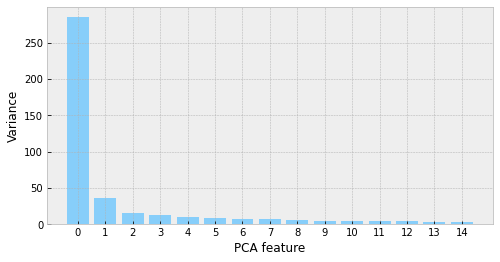

In [0]:
pca = PCA(random_state=123)
pca.fit(Data)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

### From the above graph, one feature seems to explain the highest variance

In [0]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(Data)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

### We transform the features with PCA along with n_component as 1 and use K means algorithm again

In [0]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1629,1
1,8,1971


inertia  homo    compl   v-meas   ARI     AMI     silhouette
168716   0.976   0.976   0.976   0.990   0.976    0.794


### Our Inertia and Silhouette have drastically improved when compared to without using PCA

# Results

### We can see that our Inertia and silhoutte scores drastically improve after doing Principal Component Analysis with n_component = 1 along with K means algorithm

# Conclusion

###We have read our data file from Google Drive, done pre-processing on the data, made an elbow plot to find the optimal value of K, defined a PCA function and applied it to our data and applied Kmeans again. We can see that our results have immensely improved post PCA.

###Sensor data is widely used in all the fitness applications to track a user's health and fitness. This is just one use case of what we can do with sensor data, in the coming years with the onset of 5G technology, many products with sensor data in the form of latitude, longitude, temperature, humidity, time, etc will open up a range of applications which when combined with Data Science will give rise to wide variety of applications in the field.

# References -
Dataset Source - https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

# Citation -

#### Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.